In [43]:
#Breast Cancer classification project using tensorflow
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the breast cancer dataset
breast = pd.read_csv("/Users/user/Desktop/breastcancer.csv")
print(breast.head(10))


#We have 8 attributes we have to account for, each of which is quite different from one another so we should scale the data

scale = StandardScaler()

breast_numeric = breast[['Radi' , 'Text' , 'Peri' , 'Area' , 'Smooth', 'Compact' , 'Concavity' , 'ConcaveP']]
scaled_breast_numeric = scale.fit_transform(breast_numeric)

print(scaled_breast_numeric)

#convert into a pandas dataframe
scaled_data = pd.DataFrame(scaled_breast_numeric , columns = breast_numeric.columns)

print(scaled_data.head(10))

#Combine into one data set
#Take the non scaled data
breast_ID = pd.DataFrame(breast[['ID' , 'Diag']], columns= breast.columns[0:2])

print(breast_ID.head(10))

#merge the data sets
data_total = [breast_ID.reset_index(drop=True) , scaled_data.reset_index(drop=True)]

scaled_breast = pd.concat(data_total , axis = 1 ,join='inner')

print(scaled_breast.head(10))


         ID Diag   Radi   Text    Peri    Area   Smooth  Compact  Concavity  \
0    842302    M  17.99  10.38  122.80  1001.0  0.11840  0.27760    0.30010   
1    842517    M  20.57  17.77  132.90  1326.0  0.08474  0.07864    0.08690   
2  84300903    M  19.69  21.25  130.00  1203.0  0.10960  0.15990    0.19740   
3  84348301    M  11.42  20.38   77.58   386.1  0.14250  0.28390    0.24140   
4  84358402    M  20.29  14.34  135.10  1297.0  0.10030  0.13280    0.19800   
5    843786    M  12.45  15.70   82.57   477.1  0.12780  0.17000    0.15780   
6    844359    M  18.25  19.98  119.60  1040.0  0.09463  0.10900    0.11270   
7  84458202    M  13.71  20.83   90.20   577.9  0.11890  0.16450    0.09366   
8    844981    M  13.00  21.82   87.50   519.8  0.12730  0.19320    0.18590   
9  84501001    M  12.46  24.04   83.97   475.9  0.11860  0.23960    0.22730   

   ConcaveP  
0   0.14710  
1   0.07017  
2   0.12790  
3   0.10520  
4   0.10430  
5   0.08089  
6   0.07400  
7   0.05985  
8   

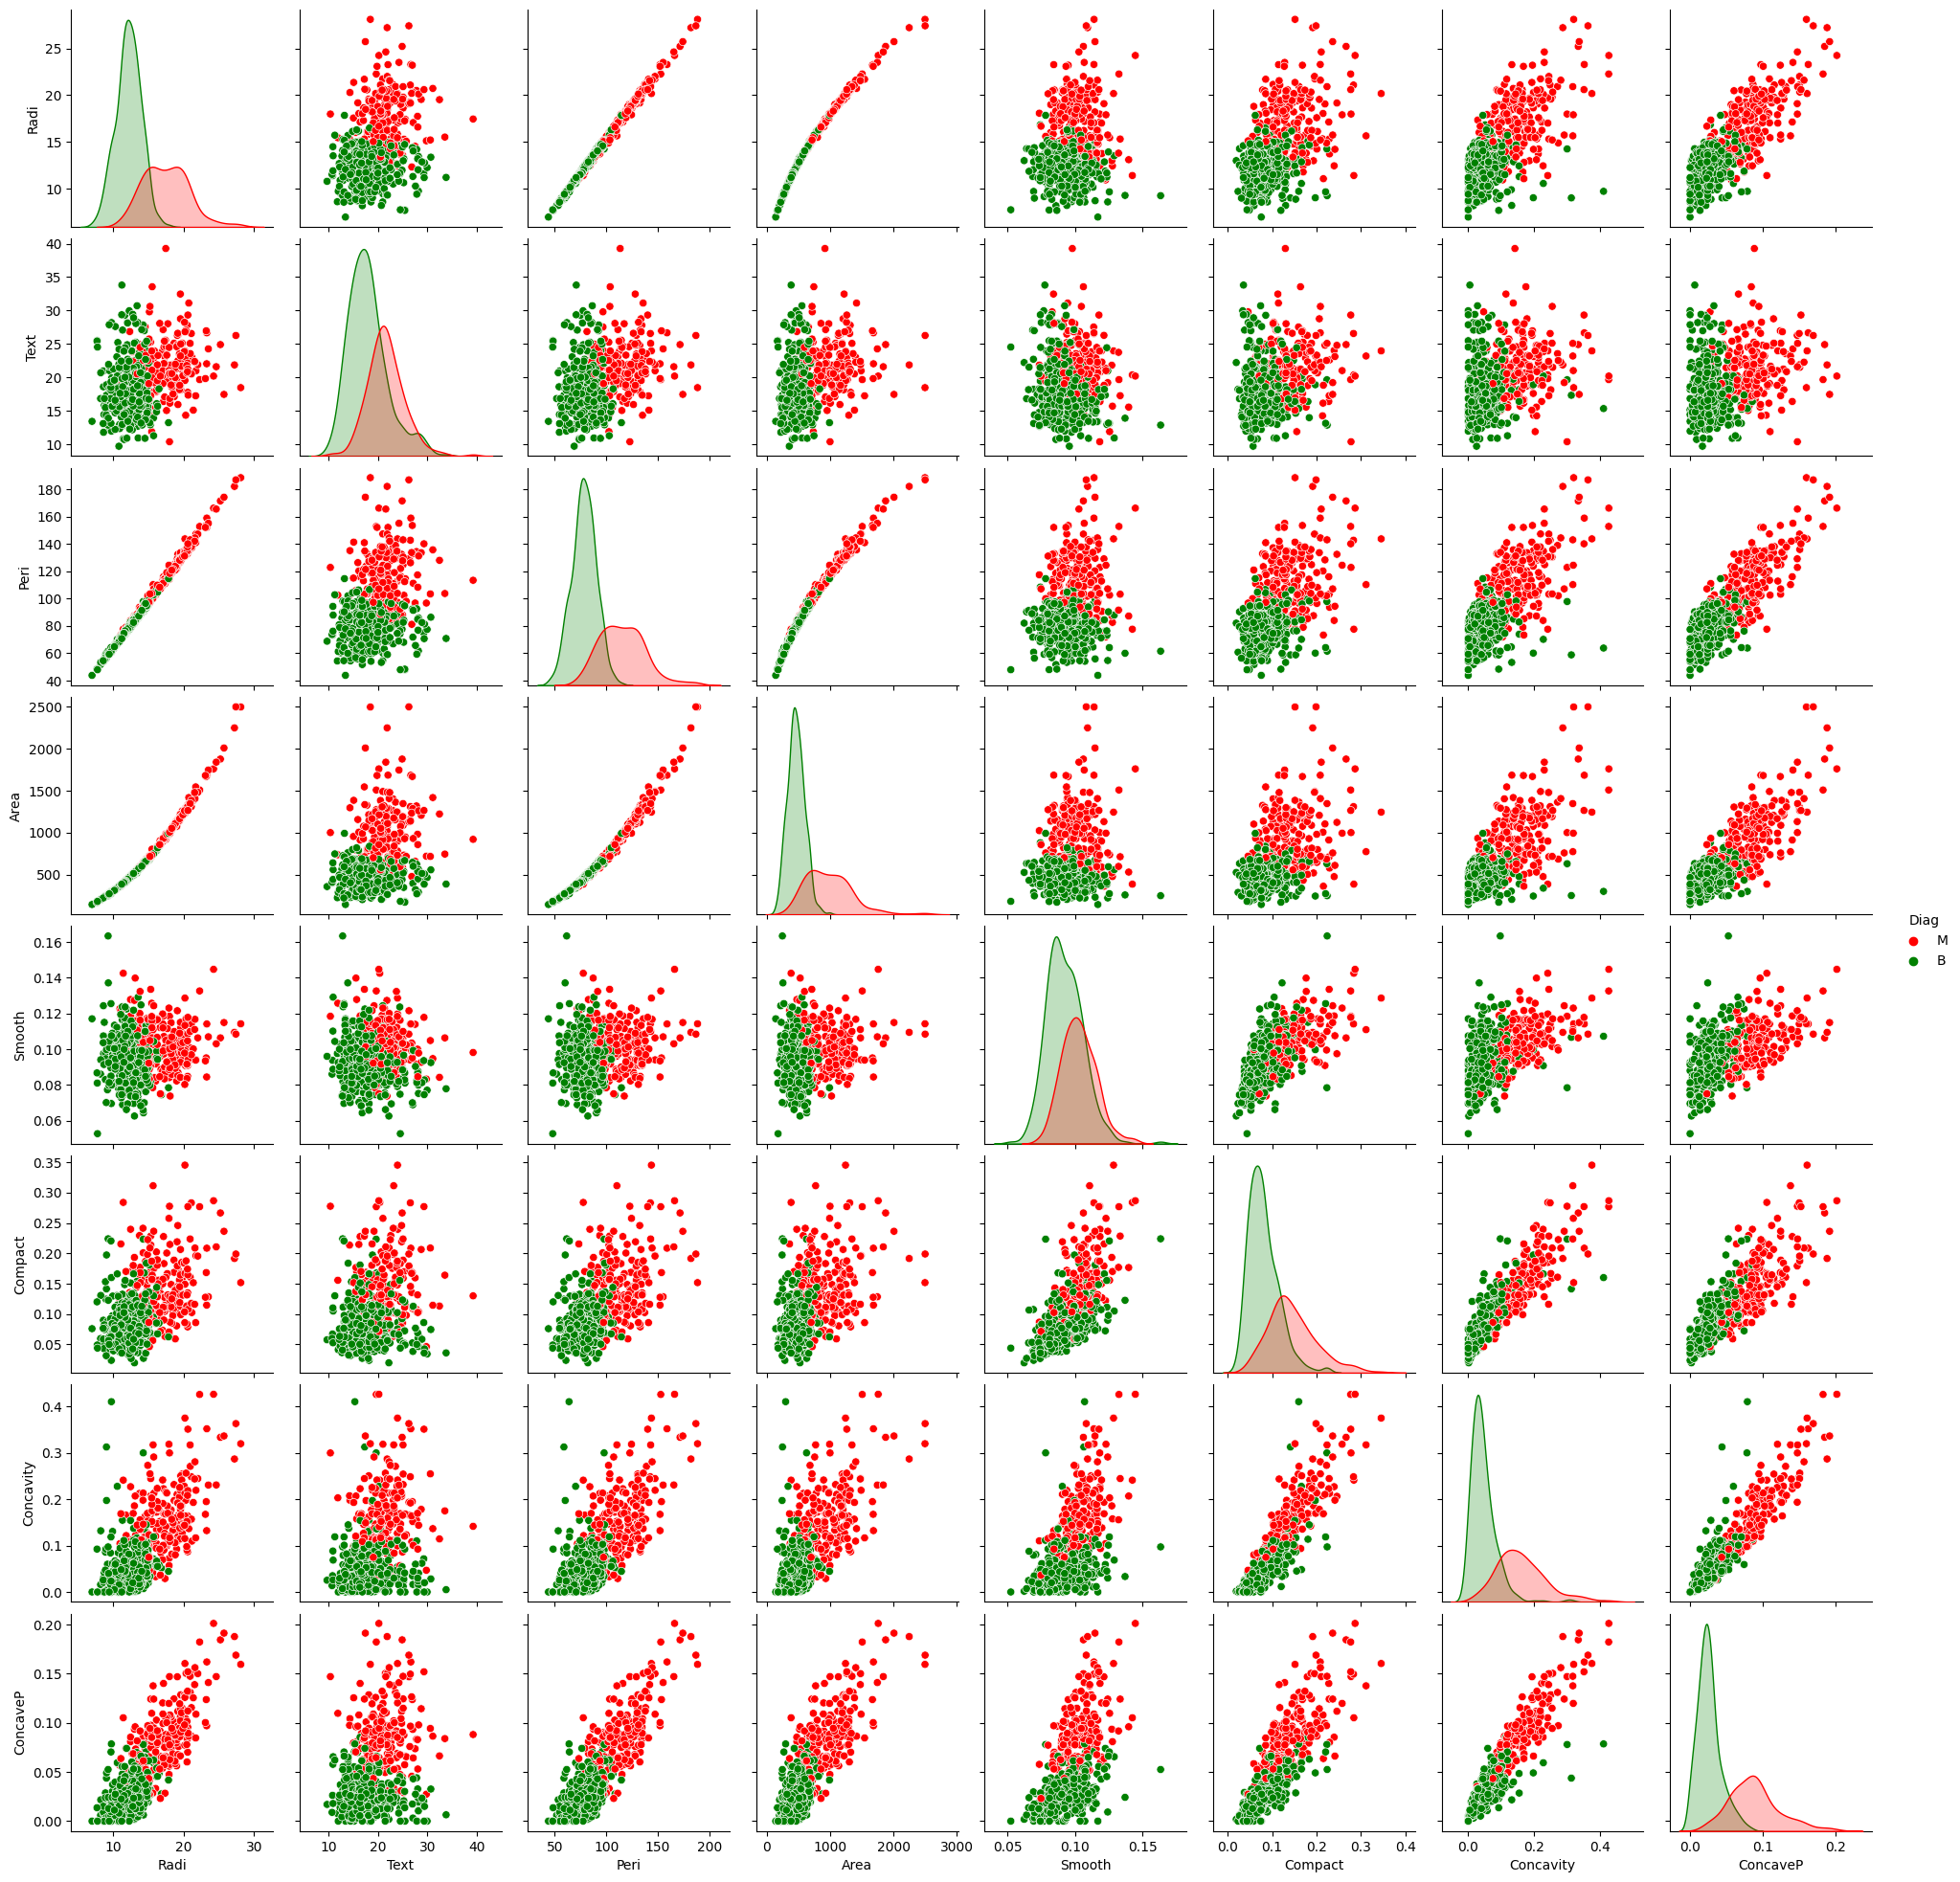

In [44]:
#Data visualization

#Pairs plot

sns.pairplot(breast, hue= 'Diag', y_vars=['Radi', 'Text'  ,'Peri' ,'Area' , 'Smooth' , 'Compact' , 'Concavity' , 'ConcaveP'] , x_vars=['Radi', 'Text'  ,'Peri' ,'Area' , 'Smooth' , 'Compact' , 'Concavity' , 'ConcaveP'],palette=['r' , 'g'])
plt.show()
#Pairs plot tells us that malignant and benign cells clearly have different distributions of the properties listed above, we see big differences in Radi, Peri, Area, Compact, Concavity and ConcaveP




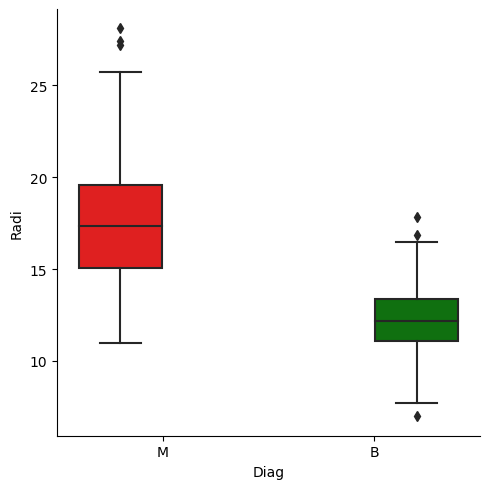

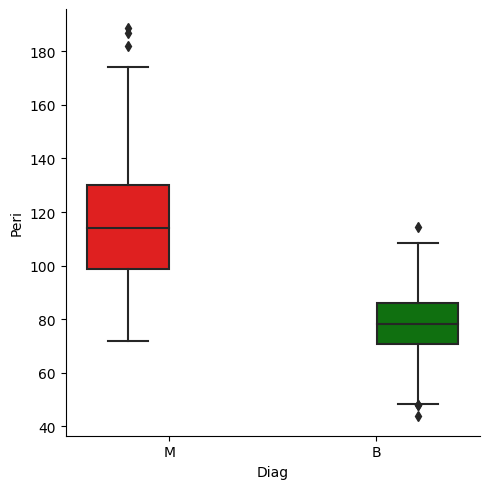

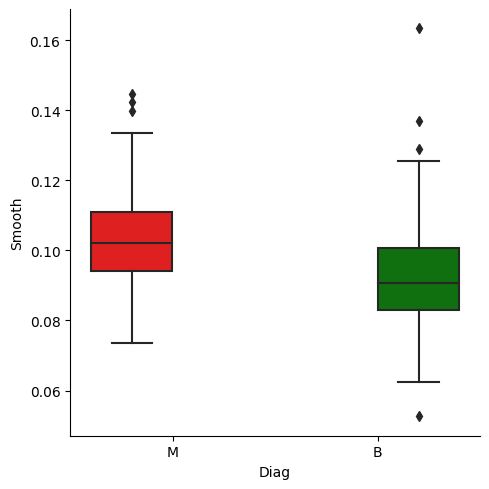

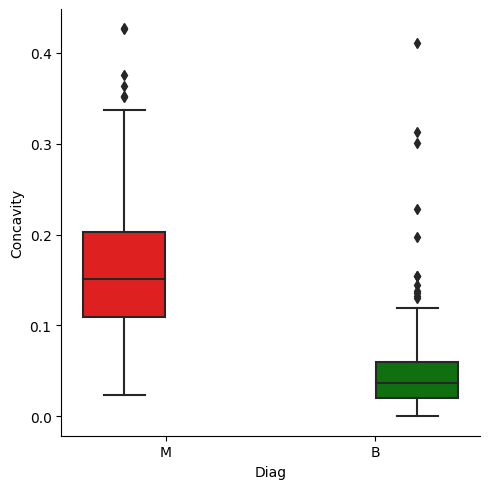

In [45]:
#We can take these same plots and turn them intp box plots to see the quartiles and averages.  Didnt plot the perimetre and area since I suspect there boxplots will look about the same
sns.catplot(breast , x = 'Diag' , y = 'Radi' , hue = 'Diag', palette=['r' , 'g'] , kind="box")


sns.catplot(breast , x = 'Diag' , y = 'Peri' , hue = 'Diag', palette=['r' , 'g'] , kind="box")

sns.catplot(breast , x = 'Diag' , y = 'Smooth' , hue = 'Diag', palette=['r' , 'g'] , kind="box")

sns.catplot(breast , x = 'Diag' , y = 'Concavity' , hue = 'Diag', palette=['r' , 'g'] , kind="box")

plt.show()



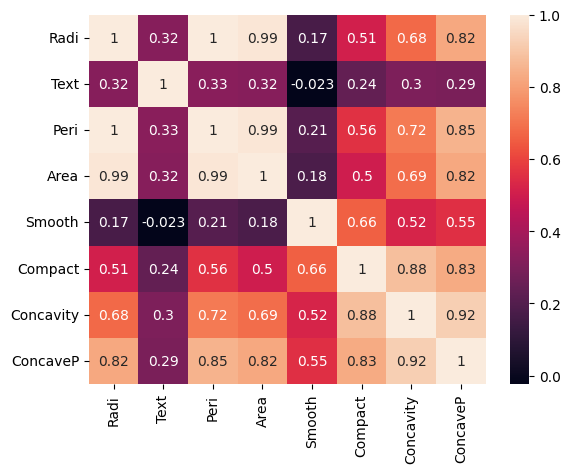

In [46]:
#We notice some collinearity in our data, to explore this more we should make a correlation matrix
correlation_mat = breast_numeric.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

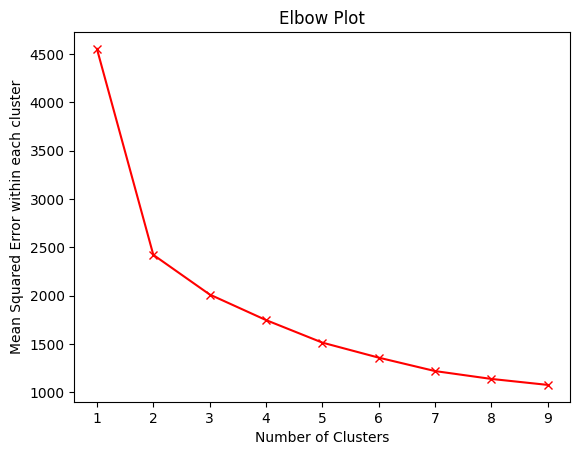

In [48]:
#Visulaize the data in a clustering context
#First we should determine how many clusters we need by employing two methods.  
#THe elbow method
from sklearn.cluster import KMeans
#Run a for loop to fit the model for k number of clusters.Then keep track of the mean squared error between the mean and the observations
elbow = []
for i in range(1,10):
    kmeanmodel = KMeans(n_clusters = i,random_state=10)
    kmeanmodel.fit(scaled_breast_numeric)
    elbow.append(kmeanmodel.inertia_)

plt.plot(range(1,10),elbow,'bx-',color = 'red')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Squared Error within each cluster')
plt.show()



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4475407630246003
For n_clusters = 3 The average silhouette_score is : 0.31145759018637775


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.2884405652564732


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.22168120776839786


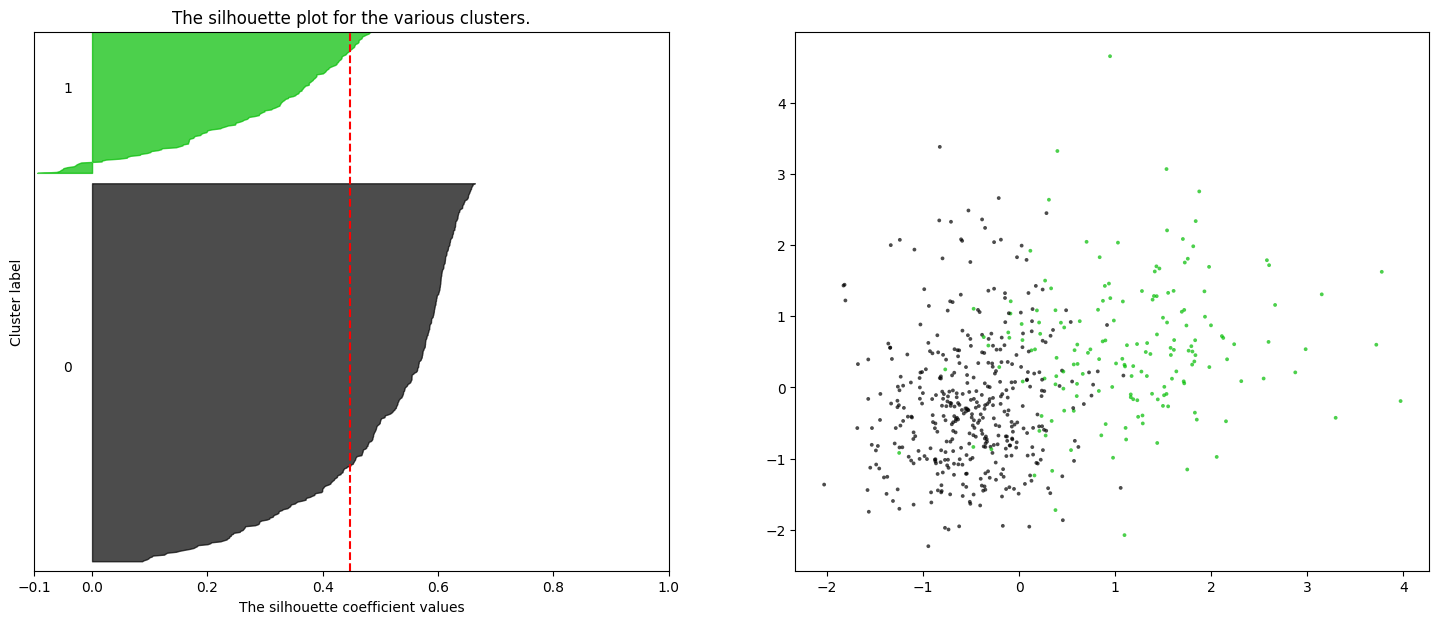

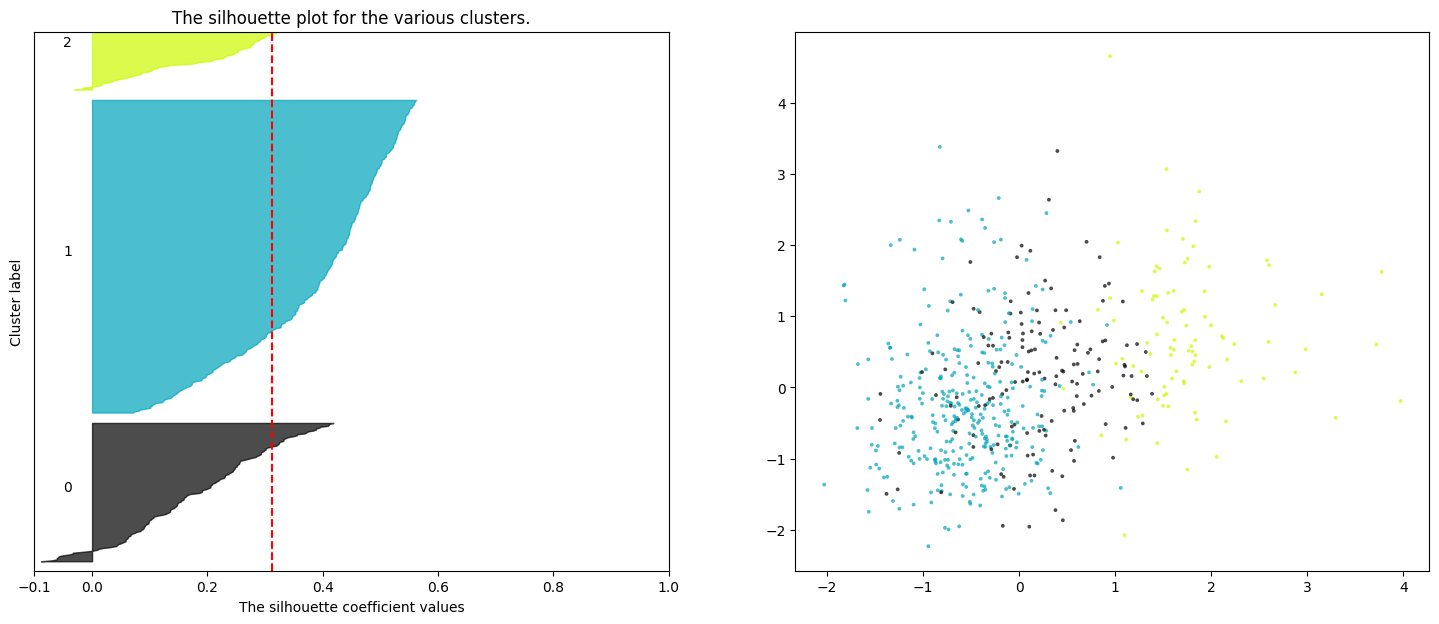

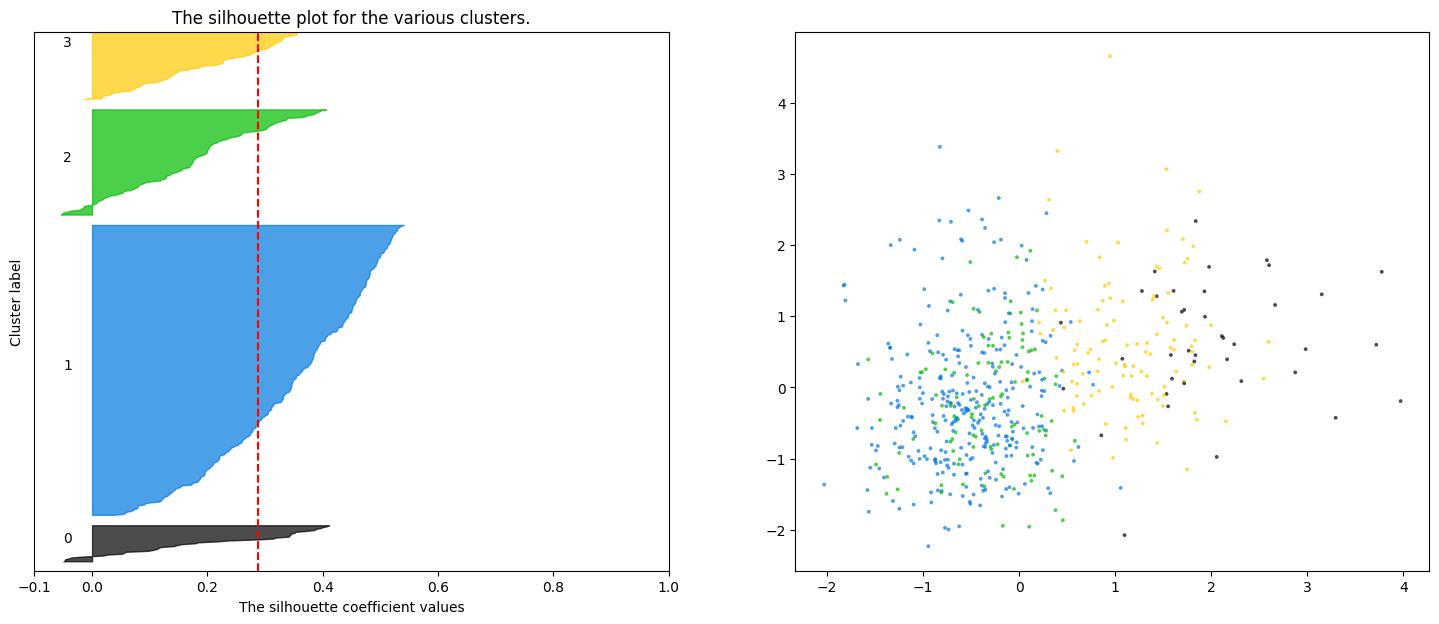

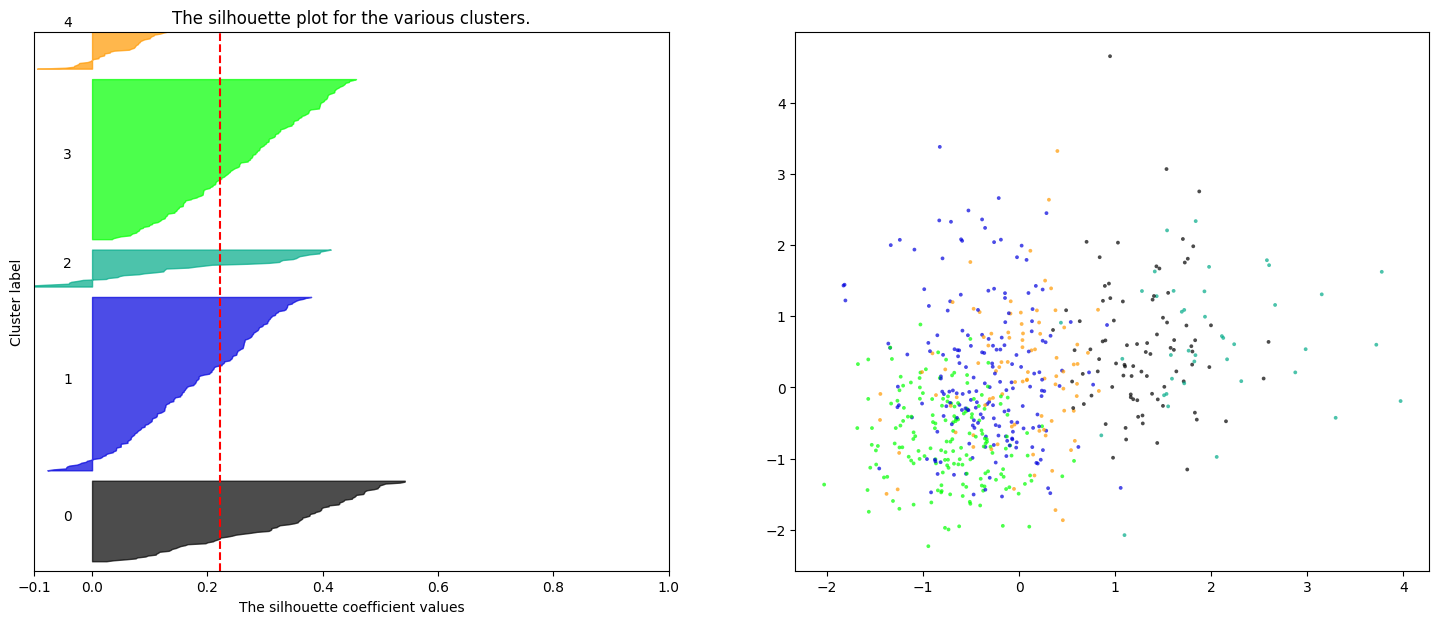

In [49]:
#We are seeing a massive drop from one to two, which should be the sweet spot for how many clusters we want.  However one should make a silhouette plot to validate these results
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
#We will evaluate from 2 to 5 cluster options
cluster_options = [2,3,4,5]

for i in cluster_options:
    #Create two subplots, one for the silhouette plot and another for the actual visulization of the clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    #first we will set out first sub plot to to be the silhouette plot
    ax1.set_xlim([-0.1 , 1])
    #Set the y limit to be from 0 to the  number of clusters we consider
    ax1.set_ylim([0,len(scaled_breast_numeric+(i + 1) * 10)])

    #Fit value for clusterers
    cluster = KMeans(n_clusters= i,random_state=10)
    cluster_label = cluster.fit_predict(scaled_breast_numeric)

    silhouette_avg = silhouette_score(scaled_breast_numeric, cluster_label)
    print(
        "For n_clusters =",
        i,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    sample_silhouette_values = silhouette_samples(scaled_breast_numeric, cluster_label)

    y_lower = 10
    for j in range(i):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_label == j]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )    
            # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_label.astype(float) / i)
    ax2.scatter(
        scaled_breast_numeric[:, 0], scaled_breast_numeric[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )



In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
#With the average score of the k=2 cluster being quite a bit higher then the rest, as well as having comparable silhouette plots.  This implies that we should go ahead and use two clusters 
kmeans_breast = KMeans(n_clusters=2)
pred_breast  = kmeans_breast.fit_predict(scaled_breast_numeric)
print(pred_breast)
#Convert the true labels to numbers
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(scaled_breast['Diag'])

print(true_labels)

ari = adjusted_rand_score(true_labels , pred_breast)
print(f"The adjusted random score is {ari}")
 

#Didn't get a good result as we can see the clusters aren't well seperated and the silhouette score was less then optimal


In [82]:
#Since this is a two class problem we can use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
#Create aliases for the numeric data and the predictor data
y = true_labels

x = scaled_breast_numeric

#Split data into training and test (70-30 split)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

log_breast = LogisticRegression(random_state= 0)

pred_log_breast = log_breast.fit(x_train,y_train)


#print(pred_log_breast.coef_)
#print(pred_log_breast.classes_)
#print(pred_log_breast.predict_proba(x))

#Just fron the head it looks great, we are seeing high probability for one class and low for the other, we want a way to properly evaluate this model
#Create a confusion matrix (2X2 grid that displays the true/false positives/negatives)
print(confusion_matrix(y_test , pred_log_breast.predict(x_test)))



ari_log = adjusted_rand_score(y_test,pred_log_breast.predict(x_test))
print(f"The adjusted random index score is {ari_log}")

#The result is a decent FPR and TPR.

true_positive = 65/(67)
true_negative = 44/ (47)
print(f'The sensitivity of the logistic regression is {true_positive}')
print(f"The specificity of the logistic regression is {true_negative}")

#Overall this model did a very good job in classifying the cells as malignant or benign





[[65  2]
 [ 3 44]]
The adjusted random index score is 0.8306636373069327
The sensitivity of the logistic regression is 0.9701492537313433
The specificity of the logistic regression is 0.9361702127659575


roc_auc_score for Logistic Regression:  0.9885677993013655


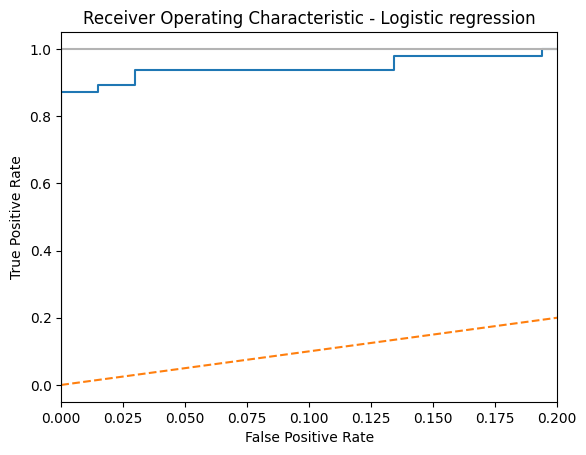

In [92]:
#We can viisulaize how our model did by plotting the ROC curve
#u = pred_log_breast.predict_proba(x_test)
#print(u)

#First we need probability estimates of the positive (malignant) class
y_score = pred_log_breast.predict_proba(x_test)[:,1]

#We create ROC curve
false_positive_rate , true_positive_rate , threshold = roc_curve(y_test , y_score)

print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))
#A very high score indicates the model is very efficient at distinguishing between a malignant cell and a benign cell.  (Represent the area under an ROC curve)\

#Plotting the ROC curve
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1] , ls = '--')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.xlim([0,0.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#The ROC curve is optimal, we have found an efficient model for predicting breast cancer cells